# K-Nearest Neighbors Training 

This notebook trains a KNN classifier

**Key Features:**
- Feature scaling (critical for KNN performance)
- SMOTE 
- Optimal k-value selection
- Hyperparameter tuning
- Comprehensive evaluation

**Note:** KNN can be slow on large datasets. Consider using a smaller sample or be patient!

## 1. Setup and Imports

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time


# Add project root to path
root_dir = os.getcwd().split("AdversarialNIDS")[0] + "AdversarialNIDS"
sys.path.append(root_dir)

from CICIDS2017.preprocessing.dataset import CICIDS2017
from UNSWNB15.preprocessing.dataset import UNSWNB15
from scripts.models.model_utils import (
    check_data_leakage
)

# Import model-specific modules
from scripts.models.knn.knn import train_knn
from scripts.models.knn.optimal_k import find_optimal_k

from scripts.logger import LoggerManager
from scripts.analysis.model_analysis import perform_model_analysis

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Imports successful")

c:\Users\storm\OneDrive\Bureau\Adverserial Project\AdversarialNIDS\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Imports successful


## 2. Initialize Logger

In [2]:
logger = LoggerManager(log_name="knn_notebook").get_logger()
logger.info("Starting KNN training notebook")

2025-11-20 16:55:53,203 - INFO - Starting KNN training notebook


## 3. Load and Preprocess Data

In [3]:
# Load dataset
logger.info("Loading CICIDS2017 dataset...")
dataset = CICIDS2017(logger=logger).optimize_memory().encode().scale().subset(size=100000, multi_class=True)

2025-11-20 16:55:53,218 - INFO - Loading CICIDS2017 dataset...
2025-11-20 16:55:53,219 - INFO - Downloading dataset: sweety18/cicids2017-full-dataset
2025-11-20 16:55:54,542 - INFO - Loading data
2025-11-20 16:56:11,891 - INFO - Initial dimensions: 2,214,469 rows x 79 columns = 174,943,051 cells
2025-11-20 16:56:31,994 - INFO - ============================================================
2025-11-20 16:56:31,995 - INFO - Preprocessing completed successfully
2025-11-20 16:56:31,997 - INFO - Final dimensions: 1,942,693 rows x 71 columns
2025-11-20 16:56:31,998 - INFO - Total rows removed: 271,776 (12.27%)
2025-11-20 16:56:32,000 - INFO - data retention rate: 87.73%
2025-11-20 16:56:32,001 - INFO - ============================================================
2025-11-20 16:56:32,009 - INFO - Optimizing memory usage of the dataset...
2025-11-20 16:56:32,021 - INFO - Initial memory usage: 1067.15 MB
2025-11-20 16:56:33,060 - INFO - Optimized memory usage: 555.81 MB
2025-11-20 16:56:33,061 - I

## 4. Data Leakage Check

In [4]:
#diagnostics = check_data_leakage(X, y, logger=logger)

## 5. Train/Test Split

In [5]:
# Split data
X_train, X_test, y_train, y_test = dataset.split(test_size=0.2, apply_smote=True)
print(f"Train set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

2025-11-20 16:57:00,872 - INFO - Splitting dataset into training and testing sets...
2025-11-20 16:57:00,893 - INFO - Class distribution before SMOTE:
2025-11-20 16:57:00,894 - INFO -   Class 0: 11396 samples
2025-11-20 16:57:00,896 - INFO -   Class 1: 1555 samples
2025-11-20 16:57:00,897 - INFO -   Class 2: 11523 samples
2025-11-20 16:57:00,898 - INFO -   Class 3: 11452 samples
2025-11-20 16:57:00,900 - INFO -   Class 4: 6 samples
2025-11-20 16:57:00,901 - INFO -   Class 5: 31 samples
2025-11-20 16:57:00,902 - INFO -   Class 6: 11349 samples
2025-11-20 16:57:04,439 - INFO - Applied SMOTE to balance the training set.
2025-11-20 16:57:04,443 - INFO - Class distribution after SMOTE:
2025-11-20 16:57:04,444 - INFO -   Class 0: 11523 samples
2025-11-20 16:57:04,445 - INFO -   Class 1: 11523 samples
2025-11-20 16:57:04,446 - INFO -   Class 2: 11523 samples
2025-11-20 16:57:04,449 - INFO -   Class 3: 11523 samples
2025-11-20 16:57:04,450 - INFO -   Class 4: 11523 samples
2025-11-20 16:57:04,

Train set shape: (80661, 70)
Test set shape: (11828, 70)


## 6. Find Optimal k Value

Let's test different k values to find the optimal one.

2025-11-20 16:57:04,472 - INFO - Finding optimal k value...
2025-11-20 16:57:04,474 - INFO - Testing k values: [3, 5, 7, 9, 11, 13, 15, 17, 19]
2025-11-20 16:57:22,338 - INFO - k=3: 0.9927 (+/- 0.0005)
2025-11-20 16:57:39,272 - INFO - k=5: 0.9924 (+/- 0.0005)
2025-11-20 16:57:57,680 - INFO - k=7: 0.9920 (+/- 0.0005)
2025-11-20 16:58:15,640 - INFO - k=9: 0.9914 (+/- 0.0004)
2025-11-20 16:58:28,109 - INFO - k=11: 0.9910 (+/- 0.0005)
2025-11-20 16:58:41,542 - INFO - k=13: 0.9906 (+/- 0.0006)
2025-11-20 16:58:53,742 - INFO - k=15: 0.9903 (+/- 0.0004)
2025-11-20 16:59:06,715 - INFO - k=17: 0.9899 (+/- 0.0005)
2025-11-20 16:59:19,053 - INFO - k=19: 0.9895 (+/- 0.0005)
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\storm\AppData\Local\Python\pythoncore-3.14-64\Lib\logging\__init__.py", line 1154, in emit
    stream.write(msg + self.terminator)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\storm\AppData\Local\Python\pythoncore-3.14-64\Lib\encodings\cp1252.

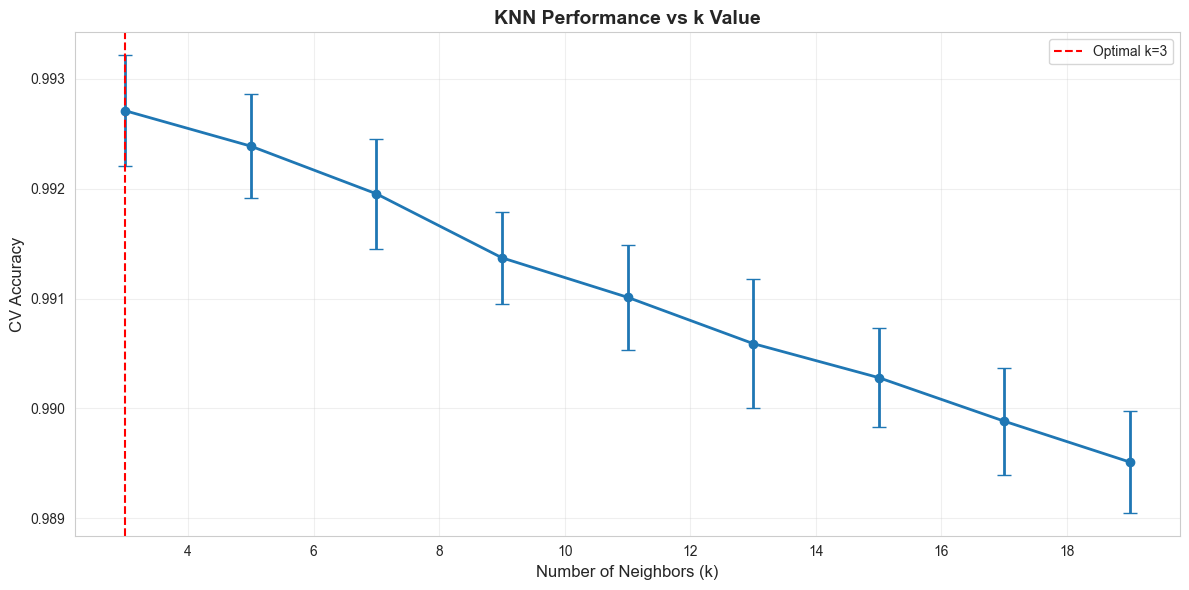


✓ Optimal k: 3
  CV Score: 0.9927


In [6]:
# Find optimal k
logger.info("Finding optimal k value...")
k_results = find_optimal_k(
    X_train, 
    y_train, 
    k_range=range(3, 21, 2),  # Test k=3,5,7,9,11,13,15,17,19
    cv=5,
    logger=logger
)

# Plot results
plt.figure(figsize=(12, 6))
plt.errorbar(k_results['k_values'], k_results['mean_scores'], 
             yerr=k_results['std_scores'], marker='o', capsize=5, linewidth=2)
plt.axvline(x=k_results['optimal_k'], color='r', linestyle='--', 
            label=f"Optimal k={k_results['optimal_k']}")
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('CV Accuracy', fontsize=12)
plt.title('KNN Performance vs k Value', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✓ Optimal k: {k_results['optimal_k']}")
print(f"  CV Score: {k_results['optimal_score']:.4f}")

## 7. Cross-Validation and training

 **This may take several minutes depending on your sample size.**

In [7]:
# Unpack model and CV scores from train_knn
knn_model, cv_scores = train_knn(
    X_train,
    y_train,
    n_neighbors=k_results['optimal_k'],
    weights='uniform',
    metric='minkowski',
    p=2,
    cv_test=False,
    cv=5,
    logger=logger
)

if cv_scores!= None:
    print("\n" + "="*50)
    print("CROSS-VALIDATION RESULTS")
    print("="*50)
    print(f"CV Scores: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    # Plot CV scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', markersize=10, linewidth=2, color='green')
    plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', 
                label=f'Mean: {cv_scores.mean():.4f}')
    plt.xlabel('Fold', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Decision Tree Cross-Validation Scores', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

2025-11-20 16:59:19,447 - INFO - Training KNN on full training set...
2025-11-20 16:59:19,458 - INFO - ==================================================
2025-11-20 16:59:19,459 - INFO - K-NEAREST NEIGHBORS MODEL
2025-11-20 16:59:19,462 - INFO - ==================================================
2025-11-20 16:59:19,463 - INFO - Parameters: n_neighbors=3, weights=uniform, metric=minkowski, p=2


## 8. Evaluate on Test Set

2025-11-20 17:01:26,091 - INFO - Running analysis for scikit-learn model: K-Nearest Neighbors


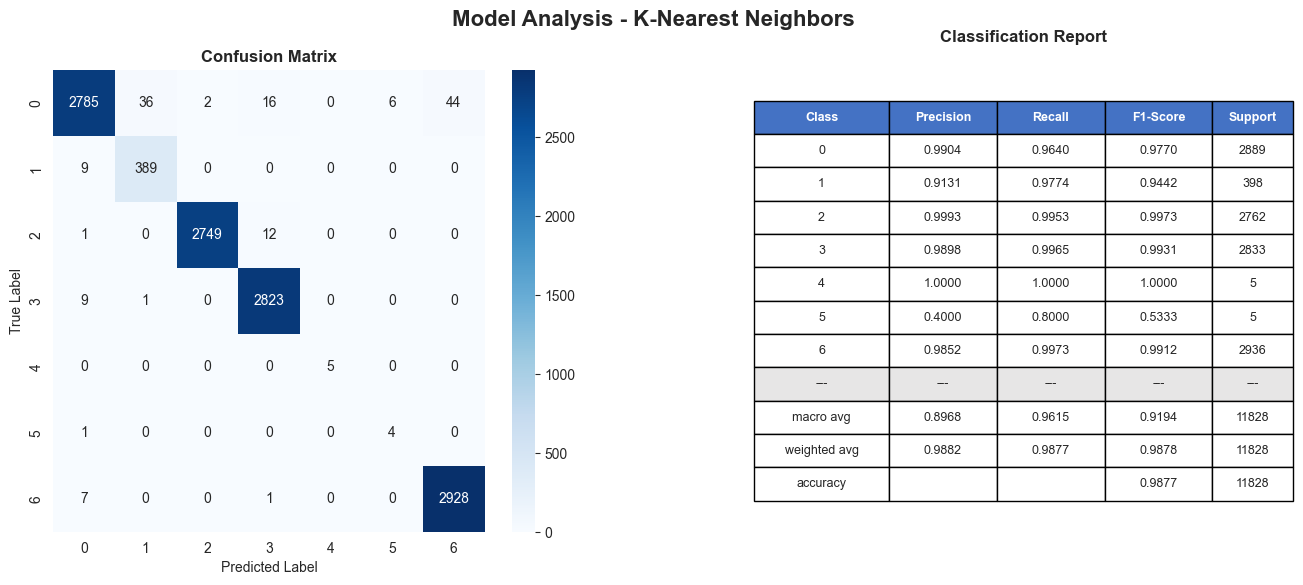

In [10]:
# Evaluate model
cm, cr = perform_model_analysis(
    model=knn_model,
    X_test=X_test,
    y_test=y_test,
    logger=logger,
    model_name="K-Nearest Neighbors",
    dir=os.getcwd(),
    plot=True
)

## 9. (Optional) Hyperparameter Tuning

**Warning:** This is computationally expensive! Only run if you have time.

In [9]:
# Uncomment to run hyperparameter tuning
# This will take a LONG time!

# logger.info("Starting hyperparameter tuning (this may take a while)...")
# best_params, best_score, grid_search = tune_knn_hyperparameters(
#     X_train_scaled, y_train, cv=3, logger=logger
# )

# print("\nBest parameters found:")
# for param, value in best_params.items():
#     print(f"  {param}: {value}")
# print(f"\nBest CV score: {best_score:.4f}")

## Tips for Improving KNN Performance

1. **Increase sample size** - More data generally helps KNN
2. **Feature selection** - Remove irrelevant features to reduce noise
3. **Dimensionality reduction** - Use PCA or other techniques
4. **Try different k values** - The optimal k depends on your data
5. **Experiment with distance metrics** - Euclidean, Manhattan, Chebyshev
6. **Use weights='distance'** - Gives more weight to closer neighbors
7. **Consider approximate KNN** - For very large datasets (e.g., FAISS, Annoy)